**Download the Dataset**

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/sample_data/Flowers-Dataset.zip

[Errno 20] Not a directory: '/content/sample_data/Flowers-Dataset.zip'
/content/sample_data


In [ ]:
cd /content/drive

/content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip Flowers.zip

Archive:  Flowers.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: fl

● Create Model
● Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)
● Compile The Model
● Fit The Model
● Save The Model


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2, horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = train_datagen.flow_from_directory(r'/content/drive/MyDrive/flowers',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentrophy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

180

In [ ]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

TypeError: ignored

In [ ]:
model.save('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg')

**Testing**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
img = image.load_img(r"/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg")

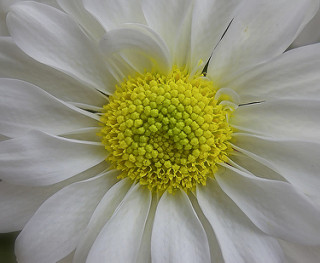

In [ ]:
img

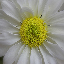

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg",target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[141., 141., 139.],
        [149., 149., 149.],
        [152., 152., 154.],
        ...,
        [162., 161., 166.],
        [154., 154., 152.],
        [153., 153., 153.]],

       [[136., 135., 131.],
        [146., 145., 143.],
        [169., 168., 174.],
        ...,
        [159., 158., 163.],
        [155., 155., 153.],
        [149., 149., 149.]],

       [[125., 125., 117.],
        [138., 140., 137.],
        [152., 152., 152.],
        ...,
        [156., 156., 156.],
        [157., 157., 155.],
        [143., 142., 140.]],

       ...,

       [[ 41.,  44.,  23.],
        [ 43.,  46.,  25.],
        [ 49.,  51.,  37.],
        ...,
        [128., 124., 121.],
        [125., 121., 118.],
        [125., 122., 117.]],

       [[ 43.,  46.,  25.],
        [ 43.,  46.,  25.],
        [ 54.,  55.,  37.],
        ...,
        [130., 126., 125.],
        [129., 125., 124.],
        [127., 123., 122.]],

       [[ 44.,  47.,  26.],
        [ 45.,  48.,  27.],
        [ 53.,  

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[141., 141., 139.],
         [149., 149., 149.],
         [152., 152., 154.],
         ...,
         [162., 161., 166.],
         [154., 154., 152.],
         [153., 153., 153.]],

        [[136., 135., 131.],
         [146., 145., 143.],
         [169., 168., 174.],
         ...,
         [159., 158., 163.],
         [155., 155., 153.],
         [149., 149., 149.]],

        [[125., 125., 117.],
         [138., 140., 137.],
         [152., 152., 152.],
         ...,
         [156., 156., 156.],
         [157., 157., 155.],
         [143., 142., 140.]],

        ...,

        [[ 41.,  44.,  23.],
         [ 43.,  46.,  25.],
         [ 49.,  51.,  37.],
         ...,
         [128., 124., 121.],
         [125., 121., 118.],
         [125., 122., 117.]],

        [[ 43.,  46.,  25.],
         [ 43.,  46.,  25.],
         [ 54.,  55.,  37.],
         ...,
         [130., 126., 125.],
         [129., 125., 124.],
         [127., 123., 122.]],

        [[ 44.,  47.,  26.],
       

In [ ]:
y = np.argmax(model.predict(x),axis=1)
y

array([1])

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
index[y[0]]

'dandelion'

**Image Augumentation**

In [ ]:
import cv2

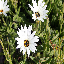

In [ ]:
img1 = image.load_img(r"/content/drive/MyDrive/flowers/daisy/10466558316_a7198b87e2.jpg",target_size=(64,64))
img1

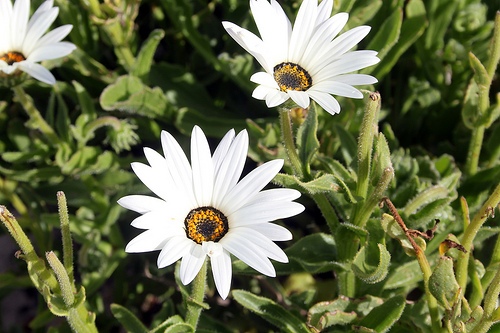

In [ ]:
img1 = image.load_img(r"/content/drive/MyDrive/flowers/daisy/10466558316_a7198b87e2.jpg")
img1

In [ ]:
import matplotlib.pyplot as plt


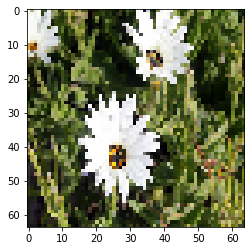

In [ ]:
plt.imshow(img1)

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/flowers/daisy/10466558316_a7198b87e2.jpg")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray

array([[[246, 242, 243],
        [250, 246, 247],
        [253, 251, 252],
        ...,
        [ 30,  45,  14],
        [ 28,  43,  14],
        [ 30,  44,  18]],

       [[247, 243, 244],
        [248, 246, 247],
        [252, 250, 251],
        ...,
        [ 29,  42,  16],
        [ 26,  39,  13],
        [ 28,  41,  15]],

       [[247, 245, 246],
        [248, 246, 247],
        [252, 250, 251],
        ...,
        [ 26,  38,  14],
        [ 25,  35,  11],
        [ 27,  37,  13]],

       ...,

       [[ 19,  25,  11],
        [ 21,  24,  17],
        [ 24,  23,  19],
        ...,
        [ 52,  84,   1],
        [ 57,  89,   4],
        [ 67,  97,  11]],

       [[ 18,  24,  10],
        [ 19,  22,  13],
        [ 20,  21,  16],
        ...,
        [ 58,  91,   2],
        [ 64,  97,   6],
        [ 73, 104,  11]],

       [[ 18,  25,   9],
        [ 18,  21,  12],
        [ 17,  18,  12],
        ...,
        [ 65, 101,   5],
        [ 74, 105,  11],
        [ 82, 112,  16]]

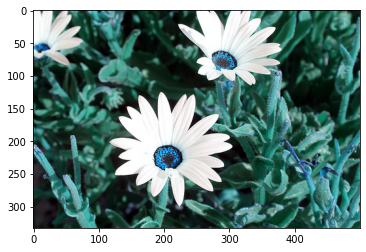

In [ ]:
plt.imshow(img1)

In [ ]:
print(img1.shape)

(333, 500, 3)


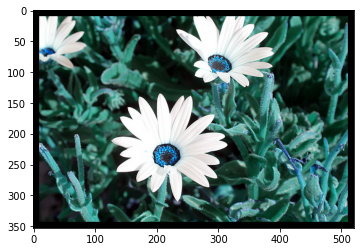

In [ ]:
img_brdr = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_ISOLATED)
plt.imshow(img_brdr)

In [ ]:
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb

array([[[246, 242, 243],
        [250, 246, 247],
        [253, 251, 252],
        ...,
        [ 30,  45,  14],
        [ 28,  43,  14],
        [ 30,  44,  18]],

       [[247, 243, 244],
        [248, 246, 247],
        [252, 250, 251],
        ...,
        [ 29,  42,  16],
        [ 26,  39,  13],
        [ 28,  41,  15]],

       [[247, 245, 246],
        [248, 246, 247],
        [252, 250, 251],
        ...,
        [ 26,  38,  14],
        [ 25,  35,  11],
        [ 27,  37,  13]],

       ...,

       [[ 19,  25,  11],
        [ 21,  24,  17],
        [ 24,  23,  19],
        ...,
        [ 52,  84,   1],
        [ 57,  89,   4],
        [ 67,  97,  11]],

       [[ 18,  24,  10],
        [ 19,  22,  13],
        [ 20,  21,  16],
        ...,
        [ 58,  91,   2],
        [ 64,  97,   6],
        [ 73, 104,  11]],

       [[ 18,  25,   9],
        [ 18,  21,  12],
        [ 17,  18,  12],
        ...,
        [ 65, 101,   5],
        [ 74, 105,  11],
        [ 82, 112,  16]]

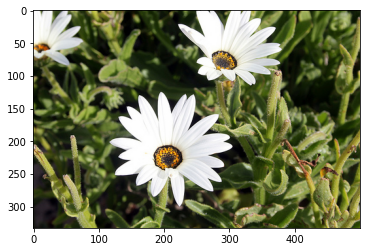

In [ ]:
plt.imshow(img_rgb)

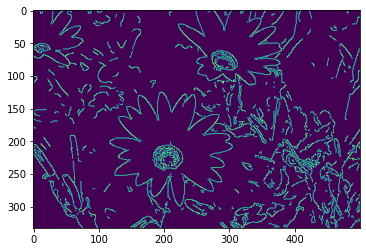

In [ ]:
canny = cv2.Canny(img_rgb,300,400)
plt.imshow(canny)

In [ ]:
kernal = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img_rgb,kernal,iterations=1)
erosion = cv2.erode(img_rgb,kernal,1)

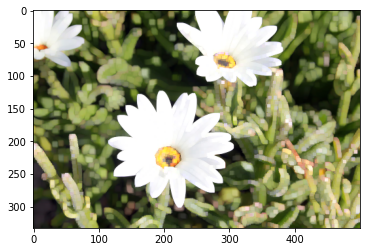

In [ ]:
plt.imshow(dilation)

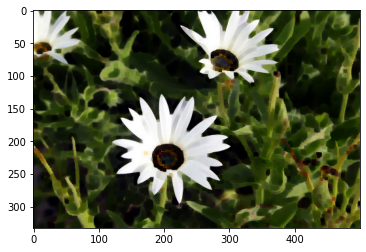

In [ ]:
plt.imshow(erosion)

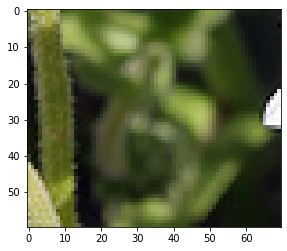

In [ ]:
img_crop = img_rgb[220:280,60:130]
plt.imshow(img_crop)

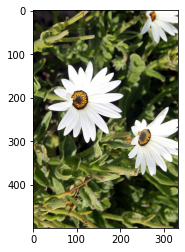

In [ ]:
img_rotate = cv2.rotate(img_rgb,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_rotate)